# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Работу выполнил студент группы 9304 Ламбин Алексей, вариант 33.

## Цель работы

Формирование представления об аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

Пусть имеется число $ x $, для которого необходимо вычислить значение $ x^{n} $ для некоторого $ n \in \mathbb{N} $. Рассмотрим некоторые методы вычисления степеней за минимально возможное число операций.

**Бинарный метод.** Пусть число $ n $ представляется в двоичном виде, как $ n_{d} = (a_{m} a_{m - 1} ... a_{0})_{b} $. Тогда число $ n $ можно разложить следующим образом: 

<center> $ n \, = \, 2^{m} a_{m} \, + \, 2^{m - 1} a_{m - 1} \, + \, \dots \, + \, 2^{1} a_{1} \, + \, a_{0} $, $ \quad a_{m} = 1 $, </center>

<center> $ n \, = \, 2^{m - 1} \left( 2 a_{m} \, + \, a_{m - 1} \right) \, + \, 2^{m - 2} a_{m - 2} \, + \, \dots \, + \, a_{0} $, </center>

<center> $ n \, = \, 2^{m - 2} \left( 2 \left( 2 a_{m} \, + \, a_{m - 1} \right) \, + \, a_{m - 2} \right) \, + \, \dots \, + \, a_{0} $, </center>

<center> $ \dots $ </center>

<center> $ n \, = \, 2 \left( \dots \left( 2 \left( 2 a_{m} \, + \, a_{m - 1} \right) \, + \, a_{m - 2} \right) \dots \right) \, + \, a_{0} $. </center>

Исходя из этого выражения можем получить цепочку значений $ b_{1} = a_{m} $, $ b_{2} = 2 b_{1} + a_{m - 1} $, $ \dots $, $ b_{m + 1} = 2 b_{m} + a_{0} = n $, где $ \forall i \in \{1, 2, \dots, m\}: a_{i} \in \{0, 1\} $. Отсюда получаем бинарный метод вычисления значения $ x^{n} $:

1. Представить число $ n $ в виде двоичной записи.
2. Рассмотреть все биты, кроме первого, двоичной записи числа $ n $.
  1. Если рассматриваемый бит &mdash; 0, то умножить число на само себя.
  2. Если рассматриваемый бит &mdash; 1, то умножить число на само себя, а затем &mdash; на основание $ x $.
  
Число операций бинарного метода равно $ \lambda \left( n \right) + \nu \left( n \right) - 1 $, где $ \lambda \left( n \right) = \left\lfloor \mathrm{lb}\,n \right\rfloor $, $ \nu \left( n \right) $ &mdash; вес Хэмминга &mdash; количество ненулевых символов в двоичной записи числа.

**Метод множителей.** Бинарный метод не всегда является самым оптимальным по количеству операций. Пусть $ n $ &mdash; составное число. Рассмотрим следующий алгоритм:

1. Расскладываем число $ n $ на простые сомножители.
2. С помощью бинарного метода находим значение $ x^{m} =: y $, где $ m $ &mdash; простой сомножитель $ n $. Далее рассматриваем новое основание $ y $.
3. Если $ n $ &mdash; простое число, то рассматривается метод множителей для числа $ n - 1 $, а затем полученное число домножается на $ x $.

Число операций такого метода равняется сумме операций для каждого из сомножителей, что в большинстве случаев меньше, чем бинарный метод.

**Определение аддитивной цепочки.** Аддитивной цепочкой для $ n \in \mathbb{N} $ называется последовательность $ 1 = a_{0} $, $ a_{1} $, $ \dots $, $ a_{m} = n $, обладающая свойством: $ \forall i \in \{1, 2, \dots, m\}: a_{i} = a_{j} + a_{k} $, где $ k \leq j < i $. $ l \left( n \right) = m $ &mdash; длина минимальной аддитивной цепочки.

Задача нахождения значения $ l \left( n \right) $ &mdash; NP-полная, поэтому решить данную задачу возможно только перебором. Однако можно дать оценки для длины минимальной аддитивной цепочки. Так бинарный метод даёт оценку $ l \left( n \right) \leq \lambda \left( n \right) + \nu \left( n \right) - 1 $, а метод множителей &mdash; $ l \left( nm \right) \leq l \left( n \right) + l \left( m \right) $.

При $ n \leq 1000 $ справедлива следующая рекуррентная формула для вычисления минимальной длины аддитивной цепочки: $ l \left( n \right) = \min{\{l \left( n - 1 \right) + 1, l_{n}\}} + \delta_{n} $, где 

<center> $ l_{p} = 
\begin{cases}
    \infty, & \quad p \text{ - простое} \\
    l \left( q \right) + l \left( \dfrac{p}{q} \right), & \quad \text{где } q \text{ - минимальный простой делитель } p
\end{cases} $ </center>

<center> $ \delta_{n} \in \{0, 1\} $ </center>

**Теорема Брауэра.** При некотором $ k < \mathrm{lb}\,\mathrm{lb}\,n $ справедливо следующее неравенство: $ l \left( n \right) < \left( 1 + k^{-1} \right) \left\lceil \mathrm{lb}\,n \right\rceil + 2^{k - 1} - k + 2 $.

Положим $ k := \lambda \left( \lambda \left( n \right) \right) - 2 \lambda \left( \lambda \left( \lambda \left( n \right) \right) \right) $, тогда получим следующие следствия из теоремы Брауэра:

1. $ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = 1 $.
2. Одна из наилучших верхних оценок длины аддитивной цепочки имеет вид: $ \lambda \left( n \right) \left( 1 + \dfrac{1}{\lambda \left( \lambda \left( n \right) \right)} + \dfrac{o \left( \lambda \left( \lambda \left( \lambda \left( n \right) \right) \right) \right)}{\left( \lambda \left( \lambda \left( n \right) \right) \right)^2} \right) $.

**Алгоритм Брауэра.** Брауэрскую цепочку для натурального числа $ n $ и некоторого параметра $ k \geq 2 $ можно задать рекуррентной формулой:

<center> $ B_{k} \left( n \right) = 
\begin{cases} 
    1, \; 2, \; 3, \; \dots, \; 2^{k} - 1, & \quad n < 2^{k} \\
    B_{k} \left( q \right), \; 2q, \; 4q, \; \dots, \; 2^{k}q, \; n, & \quad n \geq 2^{k}
\end{cases} $, </center>

где $ q = \left\lfloor \dfrac{n}{2^{k}} \right\rfloor $. 

Пусть $ n = \displaystyle\sum\limits_{i = 0}^{j} 2^{ik} a_{i} $, $ a_{j} \ne 0 $. Тогда $ B_{k} \left( n \right) = 1 $, $ 2 $, $ \dots $, $ 2^{k} - 1 $, $ 2 a_{j} $, $ 4a_{j} $, $ \dots $, $ 2^{k} a_{j} $, $ 2^{k} a_{j} + a_{j - 1} $, $ 2^{k + 1} a_{j} + 2 a_{j - 1} $, $ \dots $, $ 2^{2k} a_{j} + 2^{k} a_{j - 1} $, $ 2^{2k} a_{j} + 2^{k} a_{j - 1} + a_{j - 2} $, $ \dots $, $ n $.

Длина такой цепочки будет равна $ l_{B} \left( n \right) = j \left( k + 1 \right) + 2^{k} - 2 $, если $ jk \leq \mathrm{lb}\,n < \left( j + 1 \right) k $.

Алгоритм представляет из себя поиск значений $ q_{s} $ и $ r_{i} $ в представлении числа $ n $: $ n = 2^{k} \left( 2^{k} \left( \dots \left( 2 q_{s} + r_{s} \right) \dots \right) + r_{2} \right) + r_{1} $. Тогда $ B_{k} \left( n \right) = 1 $, $ 2 $, $ \dots $, $ 2^{k} - 1 $, $ 2 q_{s} $, $ 4q_{s} $, $ \dots $, $ 2^{k} q_{s} $, $ 2^{k} q_{s} + r_{s} $, $ \dots $, $ n $.

Данный алгоритм можно модифицировать, заменив тривиальную цепочку $ 1 $, $ 2 $, $ \dots $, $ 2^{k} - 1 $ на цепочку $ 1 $, $ 2 $, $ \dots $, $ b $, где $ b = \max\limits_{i = \{1, 2, \dots, s\}}{\{q_{s}, r_{i}\}} $. Тогда длина аддитивной цепочки будет равна $ l_{B} \left( n \right) = b + sk + \rho $, где $ \rho $ &mdash; количество $ r_{i} > 0 $.

**Алгоритм Яо.** Пусть имеются натуральное число $ n $ и параметр $ k \geq 2 $. Пусть $ n = \displaystyle\sum\limits_{i = 0}^{j} 2^{ik} a_{i} $. Введём функцию $ d \left( z \right) = \displaystyle\sum\limits_{i: a_{i} = z} 2^{ik} $.

Цепочка Яо для натурального числа $ n $ и некоторого параметра $ k $ начинается со степеней двоек: $ Y_{k} \left( n \right) = \left\{ 1, 2, 4, \dots, 2^{\lambda \left( n \right)} \right\} $, после чего для всех $ z \in \left\{ 1, 2, \dots, 2^{k} - 1 \right\} $ вычисляются $ d \left( z \right) \ne 0 $ и $ z d\left( z \right) $. Тогда $ n = \displaystyle\sum\limits_{z = 1}^{2^{k} - 1} z d \left( z \right) $.

**Звёздная цепочка.** Звёздной цепочкой называется аддитивная цепочка, обладающая свойством: $ \forall i \in \{1, 2, \dots, m\}: a_{i} = a_{i - 1} + a_{k} $, где $ k \in \{0, 1, \dots, i - 1\} $. $ l^{*} \left( n \right) = m $ &mdash; длина минимальной звёздной цепочки ($ l^{*} \left( n \right) \geq l \left( n \right) $).

Пусть имеется звёздная цепочка $ \left\{ a_{i} \right\}^{m}_{i = 1} $ ($ a_{1} = 1 $) длины $ l \left( n \right) = m - 1 $, тогда для неё можно задать вектор индексов $ \left\{ r_{i} \right\}_{i = 1}^{m - 1} $, где $ r_{i} = \left\{ x \; \middle| \; 1 \leq x \leq i \right\} $, такой, что $ \forall i \in \left\{ 2, 3, \dots, m - 1 \right\}: a_{i} = a_{i - 1} + a_{r_{i - 1}} $.

Соответственно, для наибольшей звёздной цепочки длины $ m - 1 $ $ S_{max} = \left\{ 1, 2, 4, 8, \dots, 2^{m - 1} \right\} $ вектор индексов имеет вид $ r_{max} = \left\{ 1, 2, 3, \dots, m - 1 \right\} $, а для наименьшей $ S_{min} = \left\{ 1, 2, 3, 4, \dots, m \right\} $ &mdash; $ r_{min} = \{ \underbrace{1, 1, 1, \dots, 1}_{m - 1} \} $.

Вектор индексов $ r = \left\{ r_{i} \right\}_{i = 1}^{m - 1} $ старше (больше) вектора $ \tilde{r} = \left\{ \tilde{r}_{i} \right\}_{i = 1}^{m - 1} $ ($ r \succ \tilde{r} $), если $ \exists i \in \left\{ 1, 2, \dots, m - 1 \right\}: \forall j < i: r_{j} = \tilde{r}_j \text{ и } r_{i} > \tilde{r}_{i} $.

Гипотеза Шольца–Брауэра. Для всех звёздных цепочек выполнимо следующее неравенство:

<center> $ l^{*} \left( 2^{n} - 1 \right) \leq l^{*} \left( n \right) + n - 1 $. </center>

**Алгоритм дробления вектора индексов.** Единственный точный метод поиска минимальных аддитивных цепочек &mdash; это перебор. Для того, чтобы сузить поиски, необходимо определить верхние и нижние границы длины минимальной аддитивной цепочки: $ \underline{\,l\,} \left( n \right) \leq l \left( n \right) \leq \overline{\,l\,} \left( n \right) $.

Для определения нижней границы заметим, что $ a_{i} \leq 2^{i} \Rightarrow \mathrm{lb}\,n \leq m $, тогда $ l \left( n \right) \geq \left\lceil \mathrm{lb}\,n \right\rceil =: \underline{\,l\,} \left( n \right) $. Для определения верхней границы возьмём длину цепочки, полученную бинарным методом: $ l \left( n \right) \leq \lambda \left( n \right) + \nu \left( n \right) - 1 =: \overline{\,l\,} \left( n \right) $.

Полный перебор всех возможных аддитивных цепочек длины $ l \left( n \right) $ из диапазона $ \left[ \underline{\,l\,} \left( n \right); \overline{\,l\,} \left( n \right) \right] $ займёт $ \displaystyle\sum\limits_{m = \underline{\,l\,} \left( n \right)}^{\overline{\,l\,} \left( n \right)} \left( m - 1 \right)! $ операций.

Разобьём вектор индексов $ \left\{ r_{i} \right\}_{i = 1}^{m} $ на две части: фиксированный вектор $ \left\{ r_{i} \right\}_{i = 1}^{q} $ и меняющийся вектор $ \left\{ \rho_{j} \right\}_{j = q + 1}^{m} $, где $ \rho_{j} = \left\{ x \; \middle| \; 1 \leq x \leq j \right\} $. Таких наборов получается $ \dfrac{m!}{q!} $.

Заметим, что наибольшее значение $ a_{m} = a_{max} $ будет достигаться при векторе $ \left\{ r_{i} \right\}_{i = 1}^{q} \cup \left\{ q + 1, q + 2, \dots, m \right\} $ и равняться $ a_{max} = a_{q + 1} \cdot 2^{m - q} $, а наименьшее $ a_{m} = a_{min} $ &mdash; при $ \left\{ r_{i} \right\}_{i = 1}^{q} \cup \{ \underbrace{1, 1, 1, \dots, 1}_{m - q} \} $, следовательно, $ a_{min} = a_{q + 1} + m - q $.

Для построения минимальных звёздных цепочек рассмотрим алгоритм дробления вектора индексов. Пусть имеется некий параметр $ m $, определяющий длину цепочки и меняющийся от $ \underline{\,l\,} \left( n \right) $ до $ \overline{\,l\,} \left( n \right) $. На каждом этапе выбираем некое число $ q \in \mathbb{N} $ такое, что $ 1 \leq q \leq m - 1 $. Затем перебираем все $ \left\{ r_{i} \right\}_{i = 1}^{q} $, для которых вычисляем значения $ a_{min} $ и $ a_{max} $. Если $ n \notin \left[ a_{min}; a_{max} \right] $, то переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. Если $ n \in \left[ a_{min}; a_{max} \right] $, то перебираем все $ \left\{ \rho_{j} \right\}_{j = q + 1}^{m - 1} $ и вычисляем для каждой $ a_{m} $ пока либо оно не станет равным $ n $ и мы не получим ответ, либо пока все $ \rho_{j} $ не станут равными 1. Во втором случае переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. Если все $ r_{i} $ и $ \rho_{j} $ станут равными 1, то переходим к следующему $ m $.

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

1. Применить бинарный метод и метод множителей для $ x_n $, где $ n \geq 30 $, для 2-3 значений $ n $ (значения $ n $ выбирается самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $ k $, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $ n > 500 $. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $ n  =1, 2, \dots, 200 $ путём построения функции $ l \left( n \right) $ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $ 1 < n \leq 10 $ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

**1. Сравнение бинарного метода и метода множителей.**

Для применения бинарного метода и метода множителей были реализованы функции binaryMethod() и multiplierMethod() соответственно:

In [1]:
def binaryMethod(x, n):
    if n == 0:
        return (1, 0)
    binaryNotation = str(bin(n))[3:]
    if len(binaryNotation) == 0:
        return (x, 0)
    operationsCounter = 0
    result = x
    for c in binaryNotation:
        result *= result
        operationsCounter += 1
        if c == '1':
            result *= x
            operationsCounter += 1
    return (result, operationsCounter)


def multiplierMethod(x, n):
    if n == 0:
        return (1, 0)
    dividers = []
    for divider in list(factor(n)):
        for i in range(divider[1]):
            dividers.append(divider[0])
    if len(dividers) == 1:
        (base, counter) = multiplierMethod(x, n - 1)
        return (base * x, counter + 1)
    base = x
    operationsCounter = 0
    for divider in dividers:
        (base, counter) = binaryMethod(base, divider)
        operationsCounter += counter
    return (base, operationsCounter)

Для сравнения методов вычисления степеней выполним оба алгоритма при $ n = 45 $, $ 63 $ и $ 151 $:

$ n = 45 $:

$ \quad $ *Бинарный метод:* 

$ \qquad n = 45_{d} = 101101_{b} $.

$ \qquad x \to x \cdot x = x^{2} \to x^{2} \cdot x^{2} = x^{4} \to x^{4} \cdot x = x^{5} \to x^{5} \cdot x^{5} = x^{10} \to x^{10} \cdot x = x^{11} \to x^{11} \cdot x^{11} = x^{22} \to x^{22} \cdot x^{22} = x^{44} \to x^{44} \cdot x = x^{45} $.

$ \qquad $ Число операций бинарного метода равно $ \lambda \left( 45 \right) + \nu \left( 45 \right) - 1 = 5 + 4 - 1 = 8 $.

$ \quad $ *Метод множителей:* 

$ \qquad n = 45 = 3^{2} \cdot 5 $.

$ \qquad x \to x \cdot x = x^{2} \to x^{2} \cdot x = x^{3} =: y $.

$ \qquad y \to y \cdot y = y^{2} \to y^{2} \cdot y = y^{3} =: z $.

$ \qquad z \to z \cdot z = z^{2} \to z^{2} \cdot z^{2} = z^{4} \to z^{4} \cdot z = z^{5} = y^{15} = x^{45} $.

$ \qquad $ Число операций метода множителей равно $ 7 $.

$ n = 63 $:

$ \quad $ *Бинарный метод:* 

$ \qquad n = 63_{d} = 111111_{b} $.

$ \qquad x \to x \cdot x = x^{2} \to x^{2} \cdot x = x^{3} \to x^{3} \cdot x^{3} = x^{6} \to x^{6} \cdot x = x^{7} \to x^{7} \cdot x^{7} = x^{14} \to x^{14} \cdot x = x^{15} \to x^{15} \cdot x^{15} = x^{30} \to x^{30} \cdot x = x^{31} \to $

$ \qquad \quad \to x^{31} \cdot x^{31} = x^{62} \to x^{62} \cdot x = x^{63} $.

$ \qquad $ Число операций бинарного метода равно $ \lambda \left( 63 \right) + \nu \left( 63 \right) - 1 = 5 + 6 - 1 = 10 $.

$ \quad $ *Метод множителей:* 

$ \qquad n = 63 = 3^{2} \cdot 7 $.

$ \qquad x \to x \cdot x = x^{2} \to x^{2} \cdot x = x^{3} =: y $.

$ \qquad y \to y \cdot y = y^{2} \to y^{2} \cdot y = y^{3} =: z $.

$ \qquad z \to z \cdot z = z^{2} \to z^{2} \cdot z = z^{3} \to z^{3} \cdot z^{3} = z^{6} \to z^{6} \cdot z = z^{7} = y^{21} = x^{63} $.

$ \qquad $ Число операций метода множителей равно $ 8 $.

$ n = 151 $:

$ \quad $ *Бинарный метод:* 

$ \qquad n = 151_{d} = 10010111_{b} $.

$ \qquad x \to x \cdot x = x^{2} \to x^{2} \cdot x^{2} = x^{4} \to x^{4} \cdot x^{4} = x^{8} \to x^{8} \cdot x = x^{9} \to x^{9} \cdot x^{9} = x^{18} \to x^{18} \cdot x^{18} = x^{36} \to x^{36} \cdot x = x^{37} \to $

$ \qquad \quad \to x^{37} \cdot x^{37} = x^{74} \to x^{74} \cdot x = x^{75} \to x^{75} \cdot x^{75} = x^{150} \to x^{150} \cdot x = x^{151} $.

$ \qquad $ Число операций бинарного метода равно $ \lambda \left( 151 \right) + \nu \left( 151 \right) - 1 = 7 + 5 - 1 = 11 $.

$ \quad $ *Метод множителей:* 

$ \qquad n = 151 $ &mdash; простое число. Рассмотрим число $ n - 1 = 150 = 2 \cdot 3 \cdot 5^{2} $.

$ \qquad x \to x \cdot x = x^{2} =: y $.

$ \qquad y \to y \cdot y = y^{2} \to y^{2} \cdot y = y^{3} =: z $.

$ \qquad z \to z \cdot z = z^{2} \to z^{2} \cdot z^{2} = z^{4} \to z^{4} \cdot z = z^{5} =: w $.

$ \qquad w \to w \cdot w = w^{2} \to w^{2} \cdot w^{2} = w^{4} \to w^{4} \cdot w = w^{5} = z^{25} = y^{75} = x^{150} $.

$ \qquad x^{150} \to x^{150} \cdot x = x^{151} $.

$ \qquad $ Число операций метода множителей равно $ 10 $.

In [2]:
x = 2
n = 45 # составное число
print('n = 45:')
(xnBM, operationsOfBM) = binaryMethod(x, n)
(xnMM, operationsOfMM) = multiplierMethod(x, n)
print('\tКоличество операций бинарного метода —', operationsOfBM)
print('\tКоличество операций метода множителей —', operationsOfMM)
n = 63 # 0b111111
print('n = 63:')
(xnBM, operationsOfBM) = binaryMethod(x, n)
(xnMM, operationsOfMM) = multiplierMethod(x, n)
print('\tКоличество операций бинарного метода —', operationsOfBM)
print('\tКоличество операций метода множителей —', operationsOfMM)
n = 64 # 0b111111
print('n = 64:')
(xnBM, operationsOfBM) = binaryMethod(x, n)
(xnMM, operationsOfMM) = multiplierMethod(x, n)
print('\tКоличество операций бинарного метода —', operationsOfBM)
print('\tКоличество операций метода множителей —', operationsOfMM)
n = 65 # 0b1000001
print('n = 65:')
(xnBM, operationsOfBM) = binaryMethod(x, n)
(xnMM, operationsOfMM) = multiplierMethod(x, n)
print('\tКоличество операций бинарного метода —', operationsOfBM)
print('\tКоличество операций метода множителей —', operationsOfMM)
n = 151 # простое число
print('n = 151:')
(xnBM, operationsOfBM) = binaryMethod(x, n)
(xnMM, operationsOfMM) = multiplierMethod(x, n)
print('\tКоличество операций бинарного метода —', operationsOfBM)
print('\tКоличество операций метода множителей —', operationsOfMM)

n = 45:
	Количество операций бинарного метода — 8
	Количество операций метода множителей — 7
n = 63:
	Количество операций бинарного метода — 10
	Количество операций метода множителей — 8
n = 64:
	Количество операций бинарного метода — 6
	Количество операций метода множителей — 6
n = 65:
	Количество операций бинарного метода — 7
	Количество операций метода множителей — 8
n = 151:
	Количество операций бинарного метода — 11
	Количество операций метода множителей — 10


*Выводы.* Из полученных результатов можно сделать вывод, что в среднем метод множителей работает за меньшее количество операций, чем бинарный метод.

**2. Реализация алгоритма Брауэра.**

Для применения алгоритма Брауэра была реализована функция algorithmBrouwer():

In [3]:
def algorithmBrouwer(n, k):
    d = 2 ** k
    chain = []
    if n < d:
        for unit in range(n):
            chain.append(unit + 1)
    else:
        q = n
        ri = []
        while q >= d:
            r = q % d
            ri.append(r)
            q = q // d
        ri.append(q)
        ri.reverse()
        b = max(ri)
        for unit in range(1, b + 1):
            chain.append(unit)
        q = ri[0]
        for i in range(len(ri) - 1):
            for j in range(k):
                q *= 2
                chain.append(q)
            if ri[i + 1] > 0:
                q += ri[i + 1]
                chain.append(q)
    return chain

Для упрощённого и более наглядного вывода результатов была реализована вспомогательная функция printTable(), выводящая данные в таблицу:

In [4]:
from IPython.display import HTML, display


def printTable(head, lines):
    table = '<center><table>'
    table += '<tr>'
    for name in head:
        table += '<td> <center> <h3> {} </h3> </center> </td>'.format(name)
    table += '</tr>'
    for line in lines:
        table += '<tr>'
        for cell in line:
            table += '<td> <b> {} </b> </td>'.format(cell)
        table += '</tr>'
    table += '</table></center>'
    display(HTML(table))

Для анализа результатов выполнения алгоритма Брауэра выполним алгоритм при $ n = 31 $, $ 47 $, $ 63 $, $ 64 $, $ 65 $, $ 77 $ и $ 81 $ и различных $ k $, по результатам которого построим таблицу:

In [5]:
nums = [31, 47, 63, 64, 65, 77, 81]
k = 1
result = []
for n in nums:
    while n >= 2 ** k:
        chain = algorithmBrouwer(n, k)
        if k == 1:
            result.append([n, k, ', '.join(map(str, chain)), len(chain)])
        else:
            result.append([' ', k, ', '.join(map(str, chain)), len(chain)])
        k += 1
    k = 1
printTable(['n', 'k', 'Аддитивная цепочка', 'Длина аддитивной цепочки'], result)

n,k,Аддитивная цепочка,Длина аддитивной цепочки
31,1,"1, 2, 3, 6, 7, 14, 15, 30, 31",9
,2,"1, 2, 3, 2, 4, 7, 14, 28, 31",9
,3,"1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 31",11
,4,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 31",20
47,1,"1, 2, 4, 5, 10, 11, 22, 23, 46, 47",10
,2,"1, 2, 3, 4, 8, 11, 22, 44, 47",9
,3,"1, 2, 3, 4, 5, 6, 7, 10, 20, 40, 47",11
,4,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 47",20
,5,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 32, 47",21
63,1,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 63",11


*Выводы.* Из полученных результатов можно сделать вывод, что алгоритм Брауэра может выдать минимальную цепочку и только при определённых  значениях $ k $.

**3. Реализация алгоритма дробления вектора индексов.**

Для применения алгоритма дробления вектора индексов была реализована функция vectorSplitting() и вспомогательная функция vectorReduce() для перехода к меньшему вектору индексов:

In [6]:
def vectorReduce(vector, q = 0):
    num = 0
    for i in range(len(vector) - 1, -1, -1):
        if vector[i] != 1:
            vector[i] -= 1
            num = i
            break
    for i in range(num + 1, len(vector)):
        vector[i] = i + q + 1
    return vector


def vectorSplitting(n):
    if n < 1:
        return []
    if n == 1:
        return [1]
    i = 0
    lmin = 0 
    lmax = 0
    while multiplierMethod(2, i)[0] < n:
        i += 1
    if multiplierMethod(2, i)[0] == n:
        lmin = i
    else:
        lmin = int(log(n, 2)) + 1
    lmax = int(log(n, 2)) + len(list(filter(lambda x : x == '1', str(bin(n))))) - 1
    for m in range(lmin, lmax + 1):
        indexVector = [i for i in range(1, m + 1)]
        q = m // 2
        r = indexVector[:q]
        rho = indexVector[q:]
        rFlag = True
        while rFlag:
            if len(list(filter(lambda x : x == 1, r))) == len(r):
                rFlag = False
            starChain = [1]
            a = 1
            for ri in r:
                a += starChain[ri - 1]
                starChain.append(a)
            amax = starChain[-1] * multiplierMethod(2, m - q)[0]
            amin = starChain[-1] + m - q
            if n < amin or n > amax:
                r = vectorReduce(r)
                continue
            rhoFlag = True
            while rhoFlag:
                if len(list(filter(lambda x : x == 1, rho))) == len(rho):
                    rhoFlag = False
                temp = a
                starChainSize = len(starChain)
                for ri in rho:
                    a += starChain[ri - 1]
                    starChain.append(a)
                if a == n:
                    return starChain
                starChain = starChain[:starChainSize]
                a = temp
                rho = vectorReduce(rho, q)
            r = vectorReduce(r)
            rho = indexVector[q:]

Для анализа результатов выполнения алгоритма дробления вектора индексов прогоним алгоритм при $ n = 501 $, $ 511 $, $ 512 $, $ 513 $, $ 606 $, $ 777 $ и $ 1000 $, по результатам которого построим таблицу:

In [7]:
import time as t


vector = [501, 511, 512, 513, 606, 777, 1000]
result = []
for n in vector:
    begin = t.time()
    vec = vectorSplitting(n)
    end = t.time()
    result.append([n, ', '.join(map(str, vec)), str(round(end - begin, 6)) + ' секунд'])
printTable(['n', 'Звёздная цепочка', 'Время выполнения алгоритма'], result)

n,Звёздная цепочка,Время выполнения алгоритма
501,"1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501",202.668664 секунд
511,"1, 2, 4, 8, 16, 32, 64, 72, 73, 146, 292, 438, 511",239.241365 секунд
512,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512",0.00024 секунд
513,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513",0.00082 секунд
606,"1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 202, 404, 606",199.206522 секунд
777,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 776, 777",118.471591 секунд
1000,"1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 400, 800, 1000",55.762927 секунд


Для тех же значений $ n $ запустим алгоритм дробления вектора индексов и бинарный метод. Результаты запишем в таблицу и сравним:

In [8]:
def binMethod(n):
    binNotation = str(bin(n))[3:]
    result = [1]
    for c in binNotation:
        result.append(result[-1] * 2)
        if c == '1':
            result.append(result[-1] + 1)
    return result


vector = [501, 511, 512, 513, 606, 777, 1000]
result = []
for n in vector:
    vecSplitting = vectorSplitting(n)
    vecBin = binMethod(n)
    result.append([n, ', '.join(map(str, vecSplitting)), len(vecSplitting), ', '.join(map(str, vecBin)), len(vecBin)])
printTable(['n', 'Цепочка, полученная алгоритмом дробления вектора индексов', 'Длина цепочки', 'Цепочка, полученная бинарным методом', 'Длина цепочки'], result)

n,"Цепочка, полученная алгоритмом дробления вектора индексов",Длина цепочки,"Цепочка, полученная бинарным методом",Длина цепочки
501,"1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501",13,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 124, 125, 250, 500, 501",15
511,"1, 2, 4, 8, 16, 32, 64, 72, 73, 146, 292, 438, 511",13,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 63, 126, 127, 254, 255, 510, 511",17
512,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512",10,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512",10
513,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513",11,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513",11
606,"1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 202, 404, 606",13,"1, 2, 4, 8, 9, 18, 36, 37, 74, 75, 150, 151, 302, 303, 606",15
777,"1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 776, 777",13,"1, 2, 3, 6, 12, 24, 48, 96, 97, 194, 388, 776, 777",13
1000,"1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 400, 800, 1000",13,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 124, 125, 250, 500, 1000",15


*Выводы.* Из полученных результатов можно сделать вывод, что алгоритм дробления вектора индексов выдаёт минимальную звёздную цепочку для заданного $ n $, но ввиту того, что данная задача &mdash; NP-полная, то время выполнения для некоторых $ n $ достаточно велико.

**4. Проверка первого следствия теоремы Брауэра.** 

Для проверки первого следствия теоремы Брауэра заметим, что $ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = \lim\limits_{n \rightarrow \infty} \dfrac{l^{*} \left( n \right)}{\lambda \left( n \right)} = 1 $, поэтому построим график значений длин звёздных цепочек для каждого $ n \in \mathbb{N} $ из диапазона $ \left[ 2; 200 \right] $ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов:

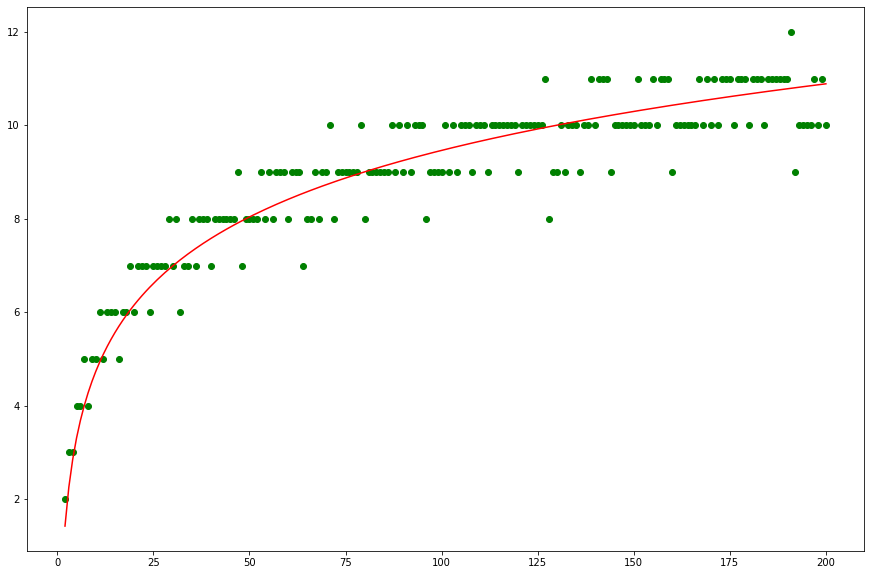

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq


x = [i for i in range(2, 201)]
y = [len(vectorSplitting(i)) for i in x]
plt.figure(figsize = (15, 10))
arr = leastsq(lambda odds, y, x: y - np.log(x) * odds[0], 1, args = (y, x))
plt.plot(x, y, 'go',  x, np.log(x) * arr[0], 'r')
plt.show()

*Выводы.* Из полученного графика можно сделать вывод, что множество значений длин звёздный цепочек аппроксимируется логарифмической кривой, следовательно, $ \lim\limits_{n \rightarrow \infty} \dfrac{l^{*} \left( n \right)}{\lambda \left( n \right)} = 1 $, что является доказательством первого следствия теоремы Брауэра.

**5. Проверка гипотезы Шольца-Брауэра.**

Для проверки гипотезы Шольца-Брауэра о том, что $ \forall n \in \mathbb{N}: l^{*} ( 2^{n} - 1 ) \leq l^{*} ( n ) + n - 1 $, построим аддитивные цепочки для $ n \leq 10 $ и найдём их длины:

In [11]:
x = [i for i in range(2, 11)]
flag = True
wrong = []
l1str = r'l^{*} ( 2^{n} - 1 ) '
l2str = r'l^{*} ( n ) '
for n in x:
    l1 = len(vectorSplitting(2 ** n - 1))
    l2 = len(vectorSplitting(n))
    show(html('$ n = {} $:'.format(n)))
    show(html('$ \\quad {} = {} $'.format(l1str, l1)))
    show(html('$ \\quad {} = {} $'.format(l2str, l2)))
    if l1 > l2 + n - 1:
        flag = False
        wrong.append(n)
if flag:
    show(html('$ {} \\leq {} + n - 1 $'.format(l1str, l2str)))
    show(html('Гипотеза Шольца-Брауэра доказана для $ 1 < n \\leq 10 $'))
else:
    show(html('Гипотеза Шольца-Брауэра не выполняется для {}'.format(', '.join(map(str, wrong)))))

<script type="math/tex"> n = 2 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 3 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 2 </script>

<script type="math/tex"> n = 3 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 5 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 3 </script>

<script type="math/tex"> n = 4 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 6 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 3 </script>

<script type="math/tex"> n = 5 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 8 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 4 </script>

<script type="math/tex"> n = 6 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 9 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 4 </script>

<script type="math/tex"> n = 7 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 11 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 5 </script>

<script type="math/tex"> n = 8 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 11 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 4 </script>

<script type="math/tex"> n = 9 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 13 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 5 </script>

<script type="math/tex"> n = 10 </script>:

<script type="math/tex"> \quad l^{*} ( 2^{n} - 1 )  = 14 </script>

<script type="math/tex"> \quad l^{*} ( n )  = 5 </script>

<script type="math/tex"> l^{*} ( 2^{n} - 1 )  \leq l^{*} ( n )  + n - 1 </script>

Гипотеза Шольца-Брауэра доказана для <script type="math/tex"> 1 < n \leq 10 </script>

*Выводы.* Из полученных результатов можно сделать вывод, что для $ 1 < n \leq 10 $ гипотеза Шольца-Брауэра выполняется.

**6. Модификации алгоритмов.**

При использовании алгоритма Брауэра построения аддитивных цепочек можно не добавлять в результат те числа, что в цепочке уже есть. Это немного замедлит работу алгоритма, поскольку на каждой итерации придётся проверять список на наличие элемента, но это уменьшит длины некоторых цепочек, преимущественно для $ k > 2 $. Так, например, сравним обе реализации для чисел $ n = 7 $, $ 11 $, $ 22 $, $ 63 $, $ 99 $, $ 123 $ и $ 199 $:

In [12]:
def algorithmBrouwerModified(n, k):
    d = 2 ** k
    chain = []
    if n < d:
        for unit in range(n):
            chain.append(unit + 1)
    else:
        q = n
        ri = []
        while q >= d:
            r = q % d
            ri.append(r)
            q = q // d
        ri.append(q)
        ri.reverse()
        b = max(ri)
        for unit in range(1, b + 1):
            chain.append(unit)
        q = ri[0]
        for i in range(len(ri) - 1):
            for j in range(k):
                q *= 2
                if q not in chain:
                    chain.append(q)
            if ri[i + 1] > 0:
                q += ri[i + 1]
                if q not in chain:
                    chain.append(q)
    return chain


nums = [7, 11, 22, 63, 99, 123, 199]
k = 1
result = []
for n in nums:
    while n >= 2 ** k:
        chain = algorithmBrouwer(n, k)
        modChain = algorithmBrouwerModified(n, k)
        if k == 1:
            result.append([n, k, ', '.join(map(str, chain)), len(chain), ', '.join(map(str, modChain)), len(modChain)])
        else:
            result.append([' ', k, ', '.join(map(str, chain)), len(chain), ', '.join(map(str, modChain)), len(modChain)])
        k += 1
    k = 1
printTable(['n', 'k', 'Аддитивная цепочка, полученная алгоритмом Брауэра', 'Длина аддитивной цепочки', 'Аддитивная цепочка, полученная модифицированным алгоритмом Брауэра', 'Длина аддитивной цепочки'], result)

n,k,"Аддитивная цепочка, полученная алгоритмом Брауэра",Длина аддитивной цепочки,"Аддитивная цепочка, полученная модифицированным алгоритмом Брауэра",Длина аддитивной цепочки
7,1,"1, 2, 3, 6, 7",5,"1, 2, 3, 6, 7",5
,2,"1, 2, 3, 2, 4, 7",6,"1, 2, 3, 4, 7",5
11,1,"1, 2, 4, 5, 10, 11",6,"1, 2, 4, 5, 10, 11",6
,2,"1, 2, 3, 4, 8, 11",6,"1, 2, 3, 4, 8, 11",6
,3,"1, 2, 3, 2, 4, 8, 11",7,"1, 2, 3, 4, 8, 11",6
22,1,"1, 2, 4, 5, 10, 11, 22",7,"1, 2, 4, 5, 10, 11, 22",7
,2,"1, 2, 2, 4, 5, 10, 20, 22",8,"1, 2, 4, 5, 10, 20, 22",7
,3,"1, 2, 3, 4, 5, 6, 4, 8, 16, 22",10,"1, 2, 3, 4, 5, 6, 8, 16, 22",9
,4,"1, 2, 3, 4, 5, 6, 2, 4, 8, 16, 22",11,"1, 2, 3, 4, 5, 6, 8, 16, 22",9
63,1,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 63",11,"1, 2, 3, 6, 7, 14, 15, 30, 31, 62, 63",11


## Выводы

В ходе практической работы были сформированы представления об аддитивных цепочках, рассмотрены алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, разработаны бинарный метод, метод множителей, алгоритм Брауэра и алгоритм дробления вектора индексов.

Было выяснено, что в среднем метод множителей работает за меньшее количество операций, чем бинарный метод, что метод Брауэра работает быстрее алгоритма дробления вектора индексов, однако второй гарантировано выдаёт наименьшую звёздную цепочку.

Было проверено первое следствие теоремы Брауэра и доказана гипотеза Шольца-Брауэра для $ 1 < n \leq 10 $.